In [124]:
import numpy as np
from spline import Spline
import math
from scipy import optimize
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

In [125]:
FOV_range = 10
scale_resolution = .1
x = np.arange(0, FOV_range*2, scale_resolution)
y = np.arange(0, FOV_range*2, scale_resolution)
x0 = 9.99
y0 = 0
sigx = 1
sigy = 1
Xg, Yg = np.meshgrid(x, y)
SiP = [10, 20]

In [ ]:
def gauss_function_2d(x, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    A = (1. / (2 * np.pi*sigma_x*sigma_y))
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

In [ ]:
def object_function(x, goalPosition=(20,20)):
    '''Calculate the difference between the goal position and the current
    position of the distance'''
    res = math.dist((x[-2], x[-1]), goalPosition)
    # print(res)
    return res

In [ ]:
GPnlc = NonlinearConstraint(object_function, 0, np.inf)

In [ ]:
# def obj_crete(x):
#     tmp = []
#     # print(len(x))
#     arr = np.zeros(int(len(x)/2))
#     # print(arr)
#     for i in range(0, len(x), 2):
#         for j in range(0, len(x), 2):
#             tmp.append(gauss_function_2d([x[i], x[i+1]], SiP[0], abs(SiP[1]-(j/2)), 1.05**(j/2), 1.05**(j/2)))
#         arr_tmp = np.array(tmp)
#         arr = arr_tmp + arr
#         tmp = []
#     # print(arr)
#     # res = list(arr)
#     # arr = arr/20
#     return arr.tolist()

In [ ]:
# def obj_crete(x):
#     tmp = []
#     j = int(len(x)/2)
#     # print(len(x))
#     arr = np.zeros(int(len(x)/2))
#     # print(arr)
#     for i in range(0, len(x), 2):
#         while (j > 0):
#             tmp.append(gauss_function_2d([x[i], x[i+1]], SiP[0], abs(SiP[1]-(j/2)), 1.05**(j/2), 1.05**(j/2)))
#             j -= 1
#         arr_tmp = np.array(tmp)
#         arr = arr_tmp + arr
#         tmp = []
#     # print(arr)
#     # res = list(arr)
#     # arr = arr/20
#     return arr.tolist()

In [ ]:
def obj_crete(x):
    tmp = []
    # print(len(x))
    arr = np.zeros(int(len(x)/2))
    # print(arr)
    for i in range(0, len(x), 2):
        tmp.append(gauss_function_2d([x[i], x[i+1]], SiP[0], abs(SiP[1]-(i/2)), 1.05**(i/2), 1.05**(i/2)))
    arr_tmp = np.array(tmp)
    arr = arr_tmp + arr
    tmp = []
    # print(arr)
    # res = list(arr)
    # arr = arr/20
    return arr.tolist()

In [ ]:
P_nlc = NonlinearConstraint(obj_crete, 0.0, 0.01)

In [ ]:
def con_cltr_pnt(x):
    con = []
    s = (0, 0) #startpoint
    con.append(math.dist((s[0], s[1]), (x[0], x[1])))
    for i in range(0, len(x)-2, 2):
        con.append(math.dist((x[i], x[i+1]), (x[i+2], x[i+3])))
    return con

In [ ]:
nlc = NonlinearConstraint(con_cltr_pnt, 0, 1)

In [ ]:
math.dist((0, 0), (20, 20))

28.284271247461902

In [127]:
# x0 = [0,0,1,1, 2,2, 3,3]
int_X0 = []
for i in range(0, 20, 1):
    int_X0.append(i)
    int_X0.append(i)

# int_X0 = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, ]
int_X0 = np.zeros(40)
print(int_X0)
res = minimize(object_function, int_X0, method='SLSQP', bounds=[(-0, 20) for i in range(len(int_X0))], constraints=[nlc, P_nlc])
# res = minimize(object_function, int_X0, method='SLSQP', bounds=[(-0, 20) for i in range(len(int_X0))], constraints=[nlc])
# res = minimize(object_function, int_X0, method='SLSQP',constraints=[nlc, P_nlc])
# res = minimize(obj_crete, int_X0, bounds=[(-0, 20) for i in range(len(int_X0))],constraints=[nlc, GPnlc])
print(res.success)
print(res.message)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
True
Optimization terminated successfully


In [128]:
print(res.x)

[ 0.57943559  0.81501809  1.1587631   1.63011335  1.73808024  2.44521565
  2.31711191  3.26052071  2.8962015   4.07578465  3.47526412  4.89106772
  4.05447109  5.70624837  4.6336921   6.52141898  5.21289739  7.3366007
  5.79222081  8.15169857  6.37145109  8.96686257  6.95063362  9.78206046
  7.73797517 10.39857763  8.52526336 11.01516283  9.31244378 11.63188568
 10.0998323  12.24834278 10.88716664 12.86486905 11.6745092  13.48138483
 12.46187989 14.09786467 13.24914122 14.71448424]


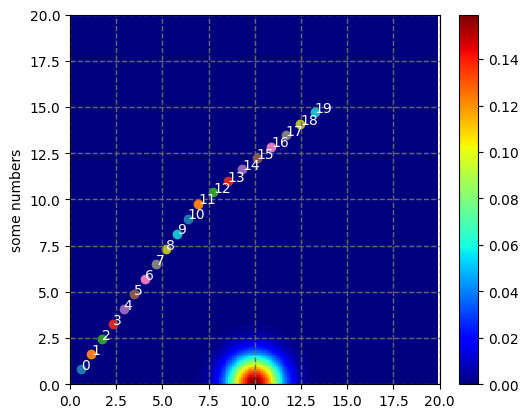

In [130]:
G = gauss_function_2d([Xg, Yg], x0, y0, sigx, sigy)
# G = np.zeros_like(G)
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(G, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# ax.scatter(x0, y0, marker='x', color='silver', s=50)
ax.grid(color='dimgrey', linestyle='--', linewidth=1)
plt.ylabel('some numbers')
plt.axis([0, FOV_range*2, 0, FOV_range*2])
for i in range(0, len(res.x), 2):
    plt.scatter(res.x[i], res.x[i+1])
    ax.annotate(int(i/2), (res.x[i], res.x[i+1]), color='w')
plt.show()

40
0


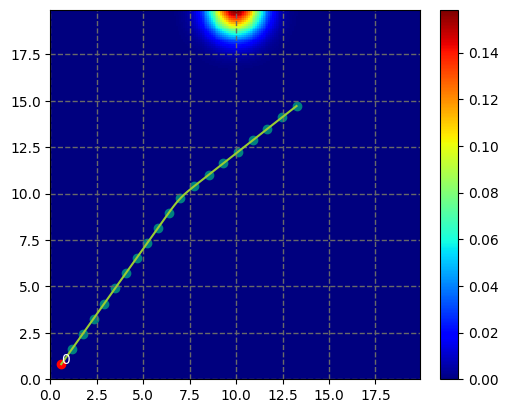

2


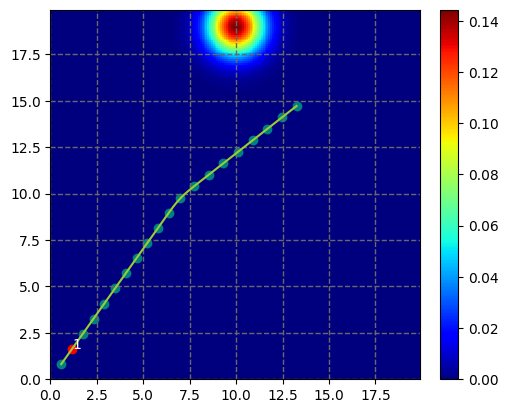

4


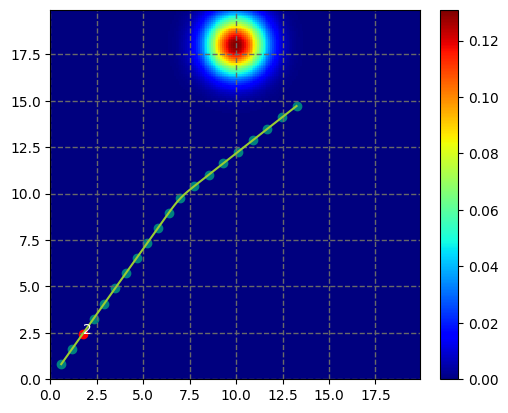

6


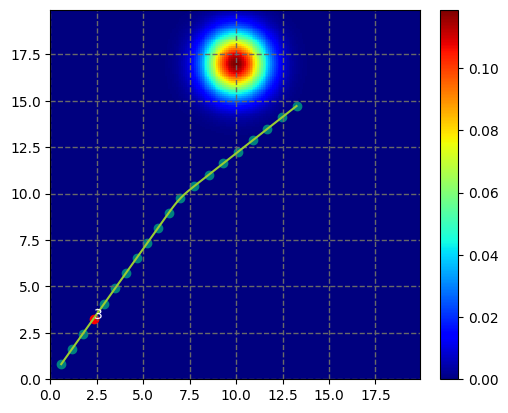

8


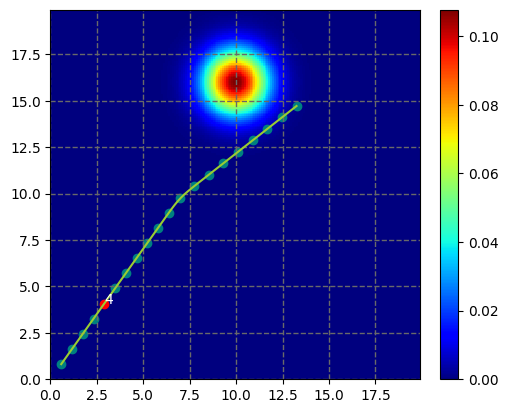

10


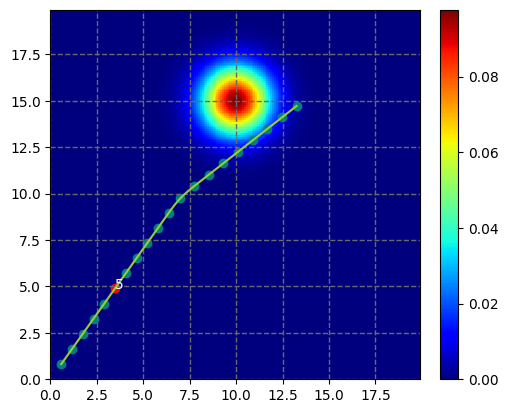

12


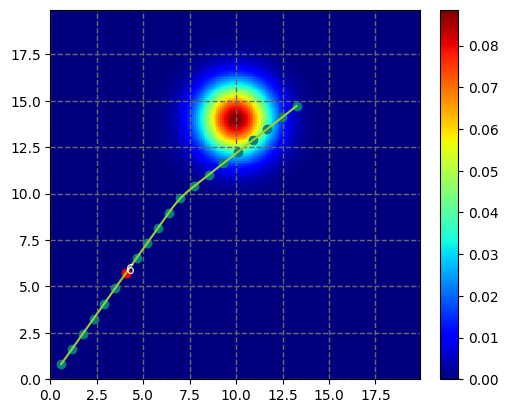

14


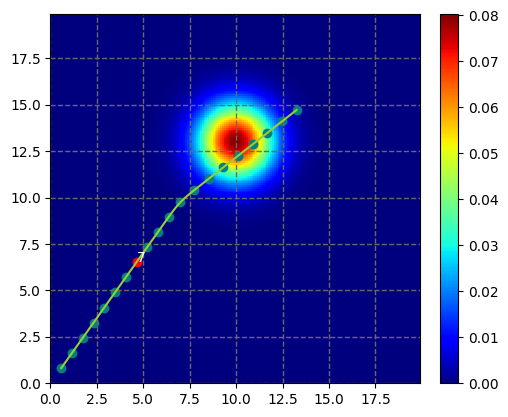

16


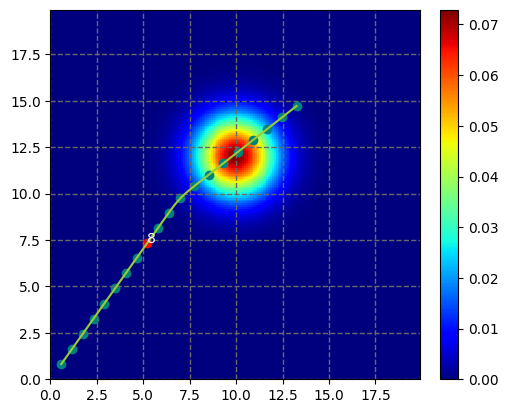

18


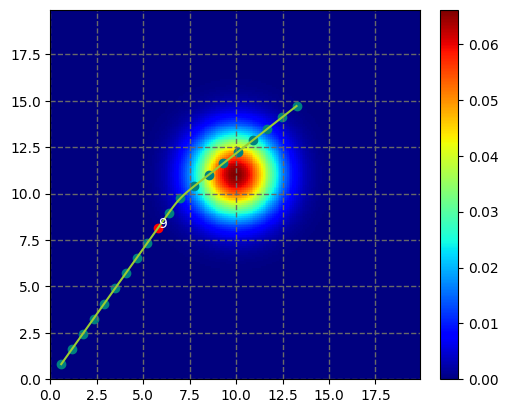

20


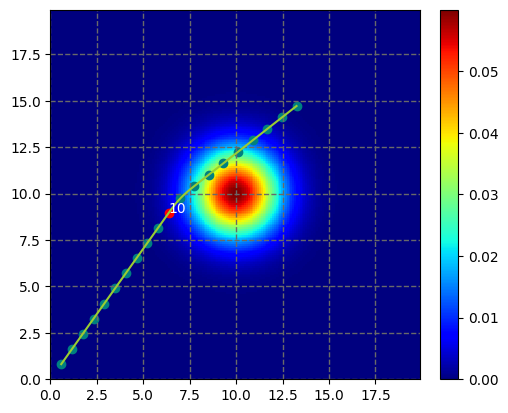

22


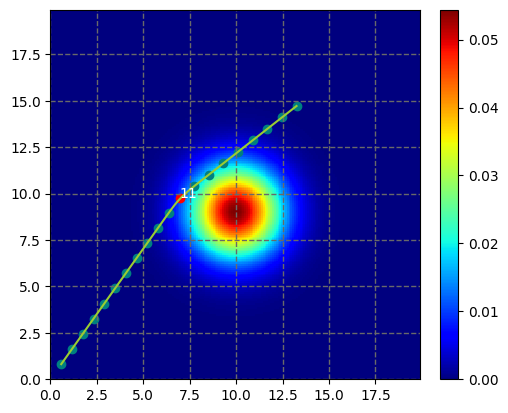

24


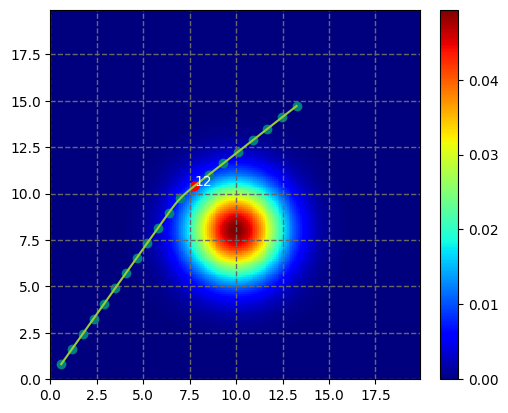

26


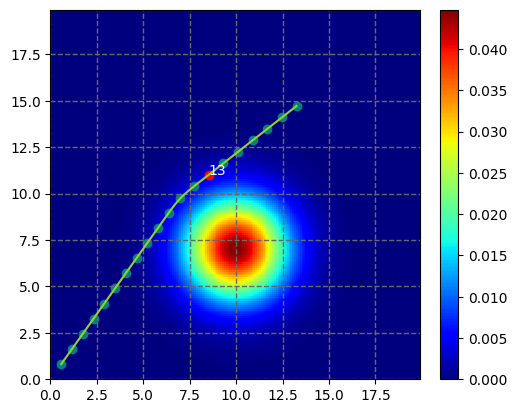

28


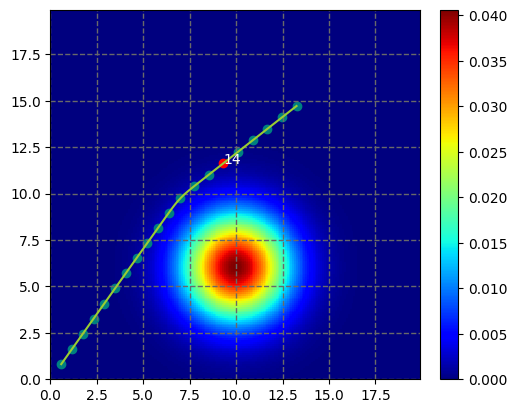

30


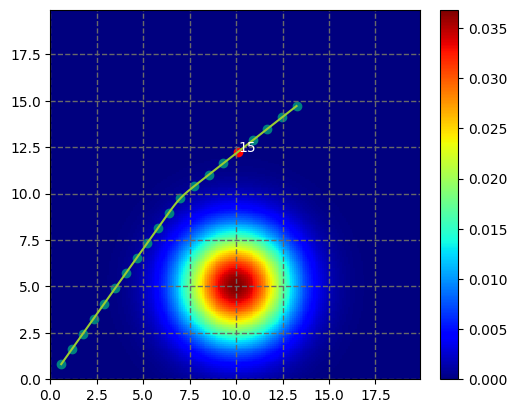

32


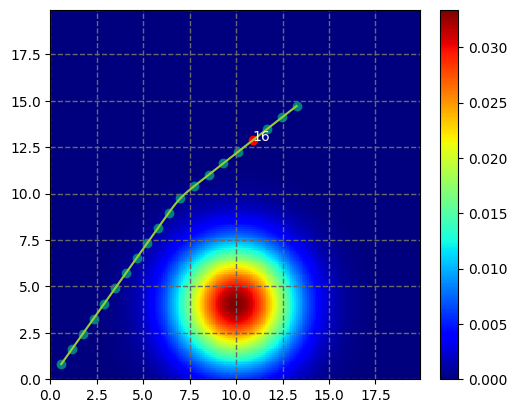

34


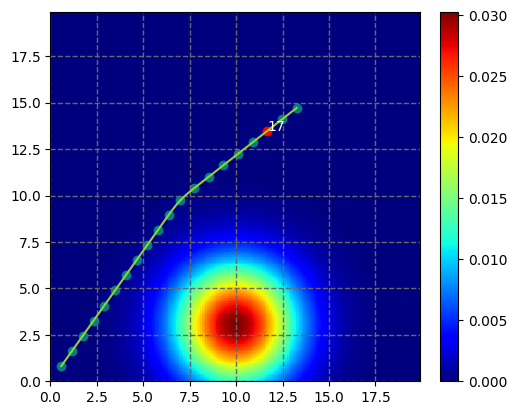

36


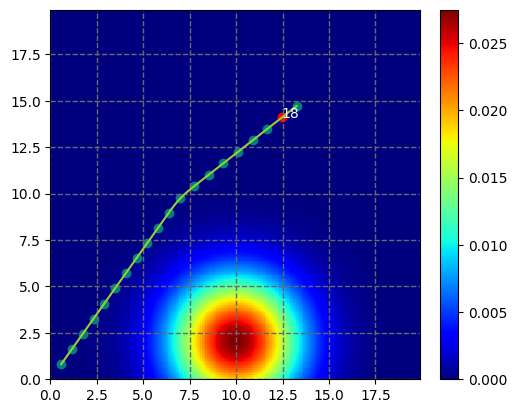

38


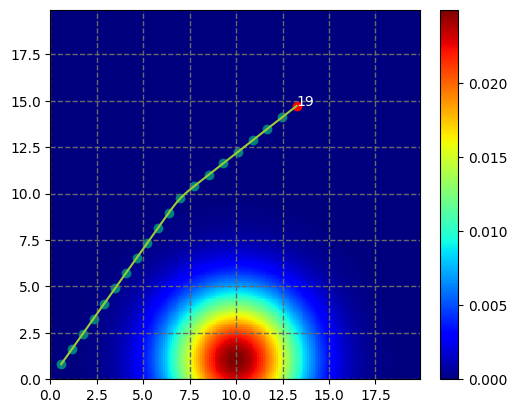

In [129]:
from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL
# Create a B-Spline curve
curve = BSpline.Curve()
# Set up the curve
curve.degree = 4

print(len(res.x))

for j in range(0, len(res.x), 2):
    cp = []
    print(j)
    G = gauss_function_2d([Xg, Yg], SiP[0], abs(SiP[1]-(j/2)), 1.05**(j/2), 1.05**(j/2))
    fig = figure()
    ax = fig.add_subplot(1,1,1)
    box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
    im = ax.imshow(G, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    # ax.scatter(x0, y0, marker='x', color='silver', s=50)
    ax.grid(color='dimgrey', linestyle='--', linewidth=1)
    # plt.ylabel('some numbers')
    for i in range(0, len(res.x), 2):
        # plt.scatter(res.x[i], res.x[i+1])
        cp.append([res.x[i], res.x[i+1]])
        if i == j:
            ax.annotate(int(i/2), (res.x[i], res.x[i+1]), color='w')
            plt.scatter(res.x[i], res.x[i+1], color='r')
        else:
            plt.scatter(res.x[i], res.x[i+1], color='teal')
    # plt.show()
    curve.ctrlpts = cp
    # Auto-generate knot vector
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    # Set evaluation delta
    curve.delta = 0.01
    curvepts = np.array(curve.evalpts)
    curveplt, = plt.plot(curvepts[:, 0], curvepts[:, 1], color='yellowgreen', linestyle='-') 

    # plt.savefig(f'./img/img_{j}.png')
    plt.show()
plt.close()



In [ ]:
import imageio
frames = []
for t in range(0, len(res.x), 2):
    image = imageio.v2.imread(f'./img/img_{t}.png')
    frames.append(image)
# print(frames)
imageio.mimsave('./example_.gif', # output gif
                frames,          # array of input frames
                fps = 2)         # optional: frames per second